In [3]:
import numpy as np
from ftplib import FTP
from urllib import request, parse
from io import BytesIO
import requests

import socket, time, json


from matplotlib import pyplot as plt
from matplotlib import rcParams as rc
from IPython.display import clear_output
import cv2
from PIL import Image
import imageio

In [4]:
def nothing(x):
    pass
 
#change the IP address below according to the
#IP shown in the Serial monitor of Arduino code
url="ftp://192.168.43.32:12345/storage/emulated/0/Pictures/XFold.jpg"

# Estabilish FTP connection

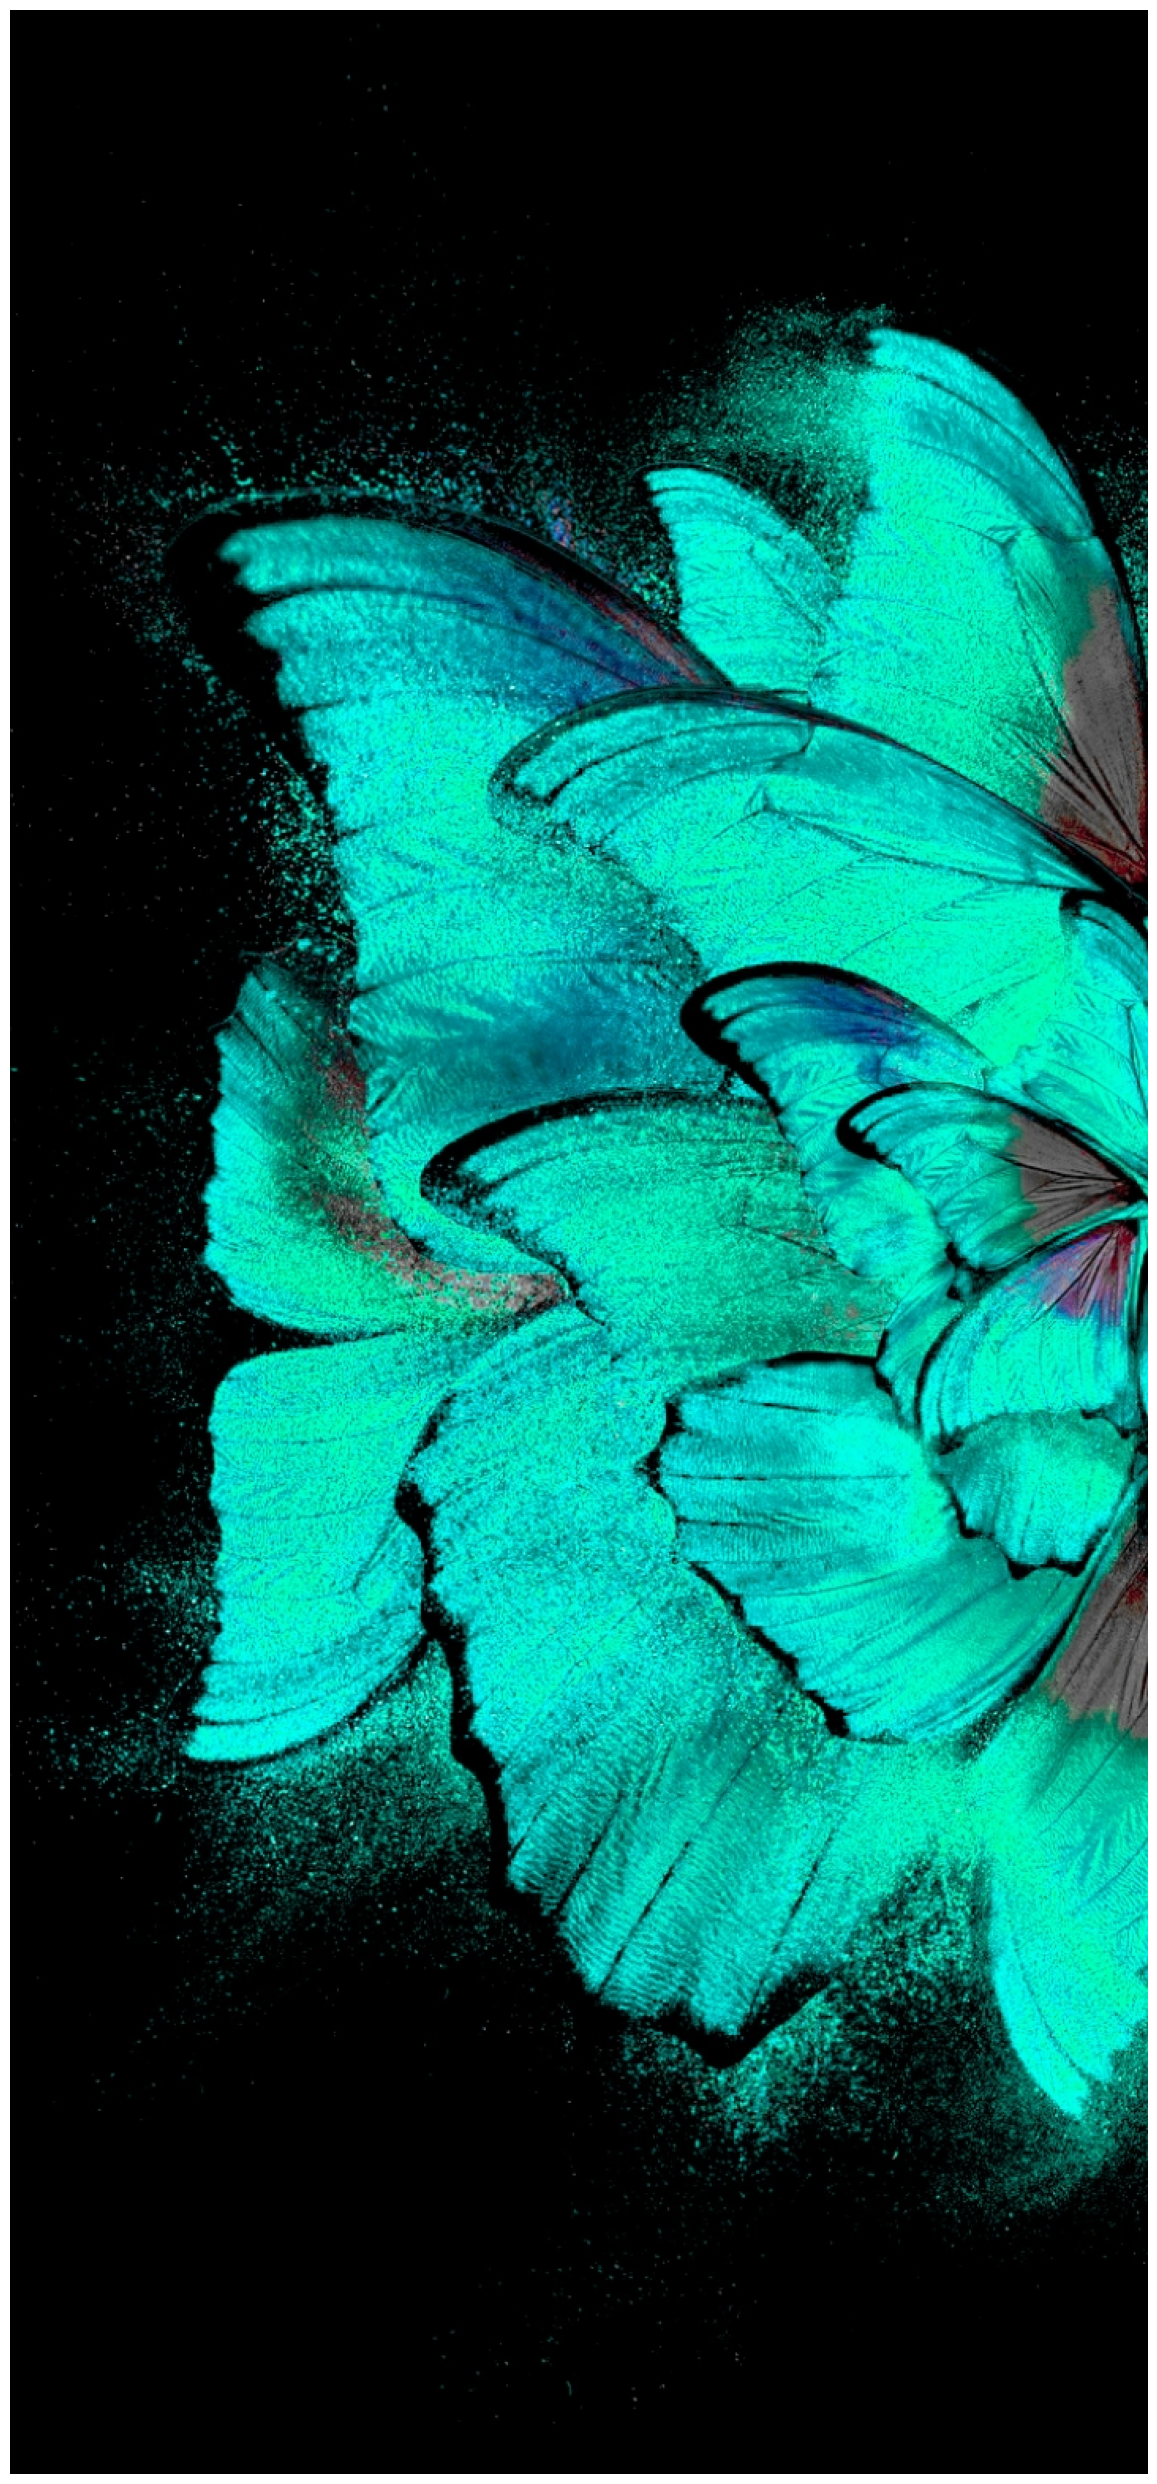

In [55]:
path="/storage/emulated/0/Pictures/"
filename="XFold.jpg"
HOST = "192.168.43.32"
PORT = 12345

ftp = FTP()
ftp.connect(HOST, PORT)
ftp.login()
ftp.cwd (path)

r = BytesIO()
ftp.retrbinary('RETR '+ filename, r.write)
ftp.quit()


img = np.asarray(bytearray(r.getvalue()), dtype="uint8")
img1 = cv2.imdecode(img, cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.axis ("off")
rc ["figure.figsize"] = 16, 32
plt.imshow(img1)

# Color Detection over FTP

Red area: 0.30375485376537426, Green area: 0.2197679756690067, Blue area: 0.47647717056561906
hello


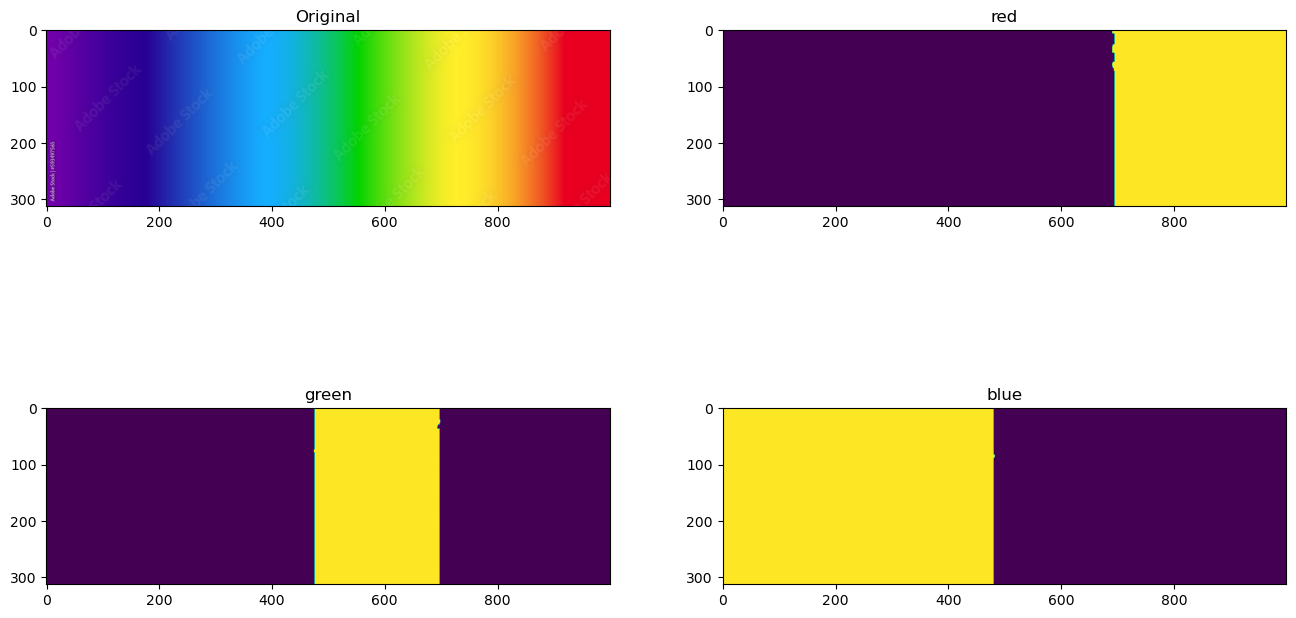

In [34]:
path="/storage/emulated/0/Pictures/"
filename="spectrum.jpg"
HOST = "192.168.43.147"
PORT = 12345

ftp = FTP()
ftp.connect(HOST, PORT)
ftp.login()
ftp.cwd (path)

r = BytesIO()
ftp.retrbinary('RETR '+ filename, r.write)
ftp.quit()


img = np.asarray(bytearray(r.getvalue()), dtype="uint8")
img1 = cv2.imdecode(img, cv2.IMREAD_COLOR)

imageFrame = img1
hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV) 
img2 = cv2.cvtColor (img1, cv2.COLOR_BGR2RGB)

cr, cg, cb = 0, 0, 0
MINS = 60
MAXS = 255
MINV = 60
MAXV = 255

CX = 3
CXcurr = 3


red_lower0 = np.array ([0, MINS, MINV], np.uint8)
red_upper0 = np.array ([30, MAXS, MAXV], np.uint8)
red_lower1 = np.array ([151, MINS, MINV], np.uint8)
red_upper1 = np.array ([179, MAXS, MAXV], np.uint8)
red_mask0 = cv2.inRange (hsvFrame, red_lower0, red_upper0) 
red_mask1 = cv2.inRange (hsvFrame, red_lower1, red_upper1)
red_mask = cv2.bitwise_or (red_mask0, red_mask1)

green_lower = np.array ([31, MINS, MINV], np.uint8)
green_upper = np.array ([85, MAXS, MAXV], np.uint8)
green_mask = cv2.inRange (hsvFrame, green_lower, green_upper) 

blue_lower = np.array ([86, MINS, MINV], np.uint8)
blue_upper = np.array ([150, MAXS, MAXV], np.uint8)
blue_mask = cv2.inRange (hsvFrame, blue_lower, blue_upper) 


'''blue_lower0 = np.array ([84, MINS, MINV], np.uint8)
blue_upper0 = np.array ([127, MAXS, MAXV], np.uint8)
blue_lower1 = np.array ([127, MINS, MINV], np.uint8)
blue_upper1 = np.array ([255, MAXS, MAXV], np.uint8)
blue_mask0 = cv2.inRange (hsvFrame, blue_lower0, blue_upper0) 
blue_mask1 = cv2.inRange (hsvFrame, blue_lower1, blue_upper1)
blue_mask = cv2.bitwise_or (blue_mask0, blue_mask1)'''




# Morphological Transform, Dilation 
# for each color and bitwise_and operator 
# between imageFrame and mask determines 
# to detect only that particular color 
kernel = np.ones((5, 5), "uint8") 


# For red color 
red_mask = cv2.dilate(red_mask, kernel) 
res_red = cv2.bitwise_and(imageFrame, imageFrame, 
                        mask = red_mask) 

# For green color 
green_mask = cv2.dilate(green_mask, kernel) 
res_green = cv2.bitwise_and(imageFrame, imageFrame, 
                            mask = green_mask) 

# For blue color 
blue_mask = cv2.dilate(blue_mask, kernel) 
res_blue = cv2.bitwise_and(imageFrame, imageFrame, 
                        mask = blue_mask) 



# Creating contour to track red color 
contours, _ = cv2.findContours(red_mask, 
                                    cv2.RETR_TREE, 
                                    cv2.CHAIN_APPROX_SIMPLE) 
arear = 0
for contour in contours: 
    area = cv2.contourArea(contour)

    if(area > 1):
        arear = arear + area
        cr = cr + 1


# Creating contour to track green color 
contours, _ = cv2.findContours(green_mask, 
                                    cv2.RETR_TREE, 
                                    cv2.CHAIN_APPROX_SIMPLE) 
areag = 0
for contour in contours: 
    area = cv2.contourArea(contour)
    
    if(area > 1):
        areag = areag + area
        cg = cg + 1


# Creating contour to track blue color 
contours, _ = cv2.findContours(blue_mask, 
                                    cv2.RETR_TREE, 
                                    cv2.CHAIN_APPROX_SIMPLE) 
areab = 0
for contour in contours: 
    area = cv2.contourArea(contour)

    if(area > 1):
        areab = areab + area
        cb = cb + 1


#print (f"Red: {cr}, Green: {cg}, Blue: {cb}")
areax = max (arear, areag, areab)
areas = arear + areag + areab
print (f"Red area: {arear / areas}, Green area: {areag / areas}, Blue area: {areab / areas}")
rc['figure.figsize'] = 16, 9

plt.subplot(221)
plt.title ("Original")
plt.imshow (img2)
plt.subplot (222)
plt.title ("red")
plt.imshow (red_mask)
plt.subplot (223)
plt.title ("green")
plt.imshow (green_mask)
plt.subplot (224)
plt.title ("blue")
plt.imshow (blue_mask)

if (areax == arear):
    CXcurr = 0
elif (areax == areag):
    CXcurr = 1
elif (areax == areab):
    CXcurr = 2
else:
    CXcurr = 3

if (CXcurr - CX) != 0:
    #do something
    print (f"hello")
    CX = CXcurr
        
else:
    #do nothing
    print (f"world")

# Color detection http server

In [173]:
CX = 3
CXcurr = 3


Red area: 0.6619204606879279, Green area: 0.021600432965303906, Blue area: 0.3164791063467683
hello


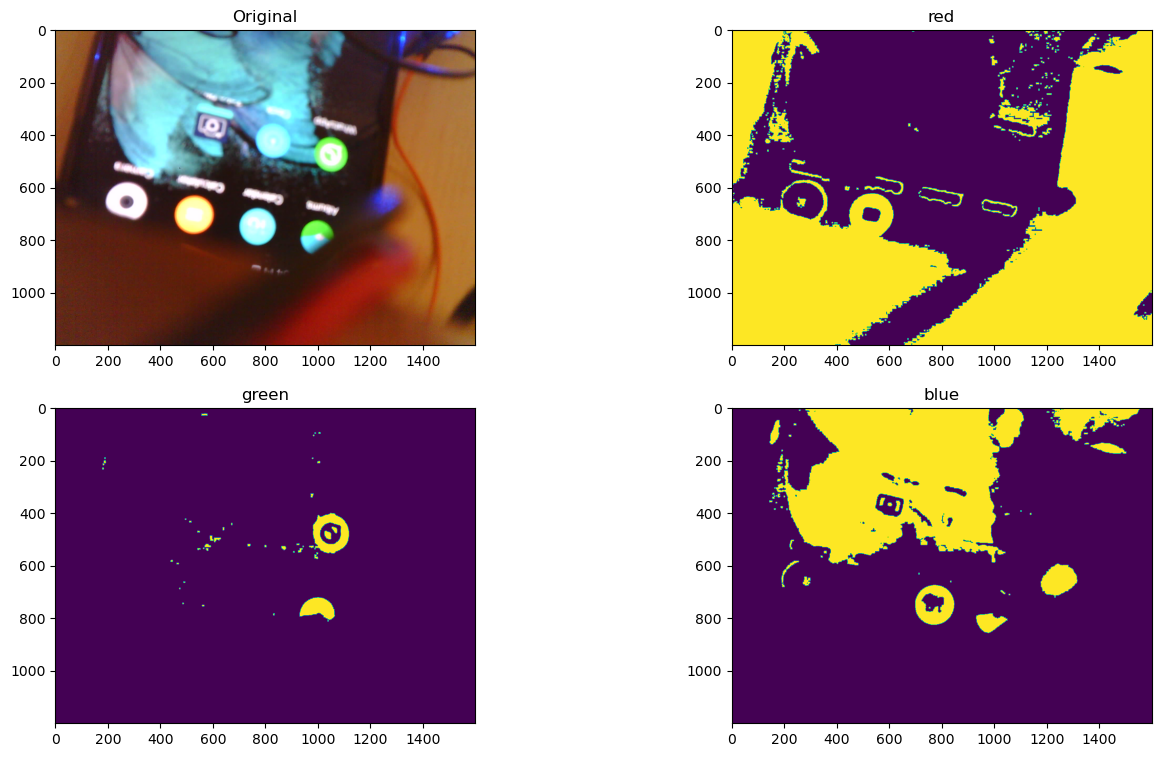

In [6]:
path="/Pictures/" + "spectrum.jpg"
path2="/vi"
url_lo="http://localhost:80"
HOST = "192.168.43.80"
PORT = 12345
HPORT1 = 8080
HPORT2 = 80
url = "http://" + str (HOST) + ":" + str (HPORT2)



url_file = url + path2
#print (url_file)
img_resp=request.urlopen (url_file)
img = np.asarray(bytearray(img_resp.read()), dtype="uint8")
img1=cv2.imdecode(img, cv2.IMREAD_COLOR)


#print (url_file)
img_resp=request.urlopen (url_file)

img = np.asarray(bytearray(img_resp.read()), dtype="uint8")
img1=cv2.imdecode(img, cv2.IMREAD_COLOR)

imageFrame = img1
hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV) 
img2 = cv2.cvtColor (img1, cv2.COLOR_BGR2RGB)

cr, cg, cb = 0, 0, 0
MINS = 60
MAXS = 255
MINV = 60
MAXV = 255

CX = 3
CXcurr = 3


red_lower0 = np.array ([0, MINS, MINV], np.uint8)
red_upper0 = np.array ([30, MAXS, MAXV], np.uint8)
red_lower1 = np.array ([151, MINS, MINV], np.uint8)
red_upper1 = np.array ([179, MAXS, MAXV], np.uint8)
red_mask0 = cv2.inRange (hsvFrame, red_lower0, red_upper0) 
red_mask1 = cv2.inRange (hsvFrame, red_lower1, red_upper1)
red_mask = cv2.bitwise_or (red_mask0, red_mask1)

green_lower = np.array ([31, MINS, MINV], np.uint8)
green_upper = np.array ([85, MAXS, MAXV], np.uint8)
green_mask = cv2.inRange (hsvFrame, green_lower, green_upper) 

blue_lower = np.array ([86, MINS, MINV], np.uint8)
blue_upper = np.array ([150, MAXS, MAXV], np.uint8)
blue_mask = cv2.inRange (hsvFrame, blue_lower, blue_upper) 


'''blue_lower0 = np.array ([84, MINS, MINV], np.uint8)
blue_upper0 = np.array ([127, MAXS, MAXV], np.uint8)
blue_lower1 = np.array ([127, MINS, MINV], np.uint8)
blue_upper1 = np.array ([255, MAXS, MAXV], np.uint8)
blue_mask0 = cv2.inRange (hsvFrame, blue_lower0, blue_upper0) 
blue_mask1 = cv2.inRange (hsvFrame, blue_lower1, blue_upper1)
blue_mask = cv2.bitwise_or (blue_mask0, blue_mask1)'''




# Morphological Transform, Dilation 
# for each color and bitwise_and operator 
# between imageFrame and mask determines 
# to detect only that particular color 
kernel = np.ones((5, 5), "uint8") 


# For red color 
red_mask = cv2.dilate(red_mask, kernel) 
res_red = cv2.bitwise_and(imageFrame, imageFrame, 
                        mask = red_mask) 

# For green color 
green_mask = cv2.dilate(green_mask, kernel) 
res_green = cv2.bitwise_and(imageFrame, imageFrame, 
                            mask = green_mask) 

# For blue color 
blue_mask = cv2.dilate(blue_mask, kernel) 
res_blue = cv2.bitwise_and(imageFrame, imageFrame, 
                        mask = blue_mask) 



# Creating contour to track red color 
contours, _ = cv2.findContours(red_mask, 
                                    cv2.RETR_TREE, 
                                    cv2.CHAIN_APPROX_SIMPLE) 
arear = 0
for contour in contours: 
    area = cv2.contourArea(contour)

    if(area > 1):
        arear = arear + area
        cr = cr + 1


# Creating contour to track green color 
contours, _ = cv2.findContours(green_mask, 
                                    cv2.RETR_TREE, 
                                    cv2.CHAIN_APPROX_SIMPLE) 
areag = 0
for contour in contours: 
    area = cv2.contourArea(contour)
    
    if(area > 1):
        areag = areag + area
        cg = cg + 1


# Creating contour to track blue color 
contours, _ = cv2.findContours(blue_mask, 
                                    cv2.RETR_TREE, 
                                    cv2.CHAIN_APPROX_SIMPLE) 
areab = 0
for contour in contours: 
    area = cv2.contourArea(contour)

    if(area > 1):
        areab = areab + area
        cb = cb + 1


#print (f"Red: {cr}, Green: {cg}, Blue: {cb}")
areax = max (arear, areag, areab)
areas = arear + areag + areab
print (f"Red area: {arear / areas}, Green area: {areag / areas}, Blue area: {areab / areas}")
rc['figure.figsize'] = 16, 9

plt.subplot(221)
plt.title ("Original")
plt.imshow (img2)
plt.subplot (222)
plt.title ("red")
plt.imshow (red_mask)
plt.subplot (223)
plt.title ("green")
plt.imshow (green_mask)
plt.subplot (224)
plt.title ("blue")
plt.imshow (blue_mask)

if (areax == arear):
    CXcurr = 0
elif (areax == areag):
    CXcurr = 1
elif (areax == areab):
    CXcurr = 2
else:
    CXcurr = 3

if (CXcurr - CX) != 0:
    #do something
    print (f"hello")
    CX = CXcurr
        
else:
    #do nothing
    print (f"world")